Text(0, 0.5, 'y')

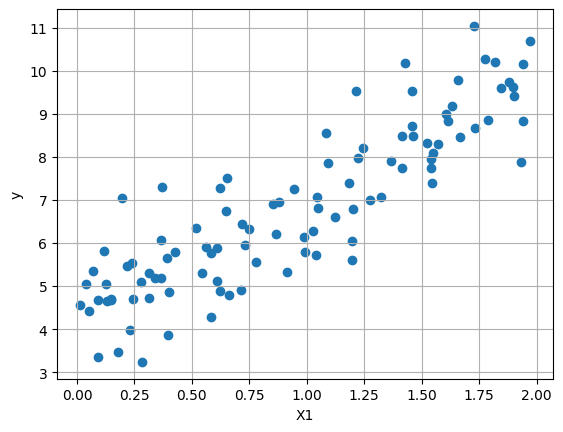

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

plt.scatter(X, y, color="blue")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")